# Covariance and Correlation
# 共變異數和相關性

Covariance measures how two variables vary in tandem from their means.

For example, let's say we work for an e-commerce company, and they are interested in finding a correlation between page speed (how fast each web page renders for a customer) and how much a customer spends.

numpy offers covariance methods, but we'll do it the "hard way" to show what happens under the hood. Basically we treat each variable as a vector of deviations from the mean, and compute the "dot product" of both vectors. Geometrically this can be thought of as the angle between the two vectors in a high-dimensional space, but you can just think of it as a measure of similarity between the two variables.

First, let's just make page speed and purchase amount totally random and independent of each other; a very small covariance will result as there is no real correlation:

例如，假設我們為一家電子商務公司工作，他們有興趣找到每個網頁為客戶頁面載入速度和客戶花費多少之間的相關性。

創建完全隨機和相互獨立：由於沒有真正的相關性，將產生非常小的共變異數：

-0.1862297602348302

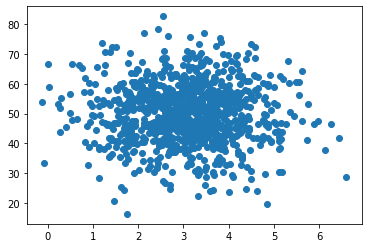

In [19]:
%matplotlib inline

import numpy as np
from pylab import *

def de_mean(x):                    #算標準差
    xmean = mean(x)
    return [xi - xmean for xi in x]

def covariance(x, y):            #共變異數
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

scatter(pageSpeeds, purchaseAmount)

covariance (pageSpeeds, purchaseAmount)

Now we'll make our fabricated purchase amounts an actual function of page speed, making a very real correlation. The negative value indicates an inverse relationship; pages that render in less time result in more money spent:

現在，將捏造購買金額與頁面載入速度產生相關性。負值表示反向關係;在更短的時間內瀏覽的頁面會導致花費更多的錢：

-24.478793271835023

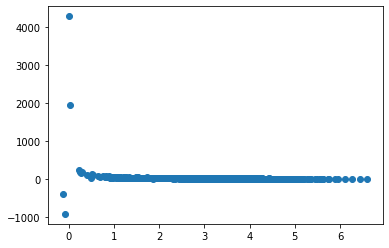

In [20]:
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

covariance (pageSpeeds, purchaseAmount)

But, what does this value mean? Covariance is sensitive to the units used in the variables, which makes it difficult to interpret. Correlation normalizes everything by their standard deviations, giving you an easier to understand value that ranges from -1 (for a perfect inverse correlation) to 1 (for a perfect positive correlation):

相關性通過標準差的正規化，更容易理解價值，範圍從 -1（完美的反向相關性）到 1（完美的正相關性）：

In [21]:
def correlation(x, y):           #共變異數 除以 標準差 等於 標準差的正規化(相關性)
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) / stddevx / stddevy  #必須確認分母不可以為0
        
correlation(pageSpeeds, purchaseAmount)

-0.1530968603466149

numpy can do all this for you with numpy.corrcoef. It returns a matrix of the correlation coefficients between every combination of the arrays passed in:

numpy快速計算相關性:

In [23]:
np.corrcoef(pageSpeeds, purchaseAmount) 
# 1 表示pageSpeeds, purchaseAmount各自完全正相關，
# 但無論是pageSpeeds, purchaseAmount 還是 purchaseAmount, pageSpeeds 它們之間的相關係數都是-0.1529
# 與手動計算的結果大致相同

array([[ 1.        , -0.15294376],
       [-0.15294376,  1.        ]])

(It doesn't match exactly just due to the math precision available on a computer.)

We can force a perfect correlation by fabricating a totally linear relationship (again, it's not exactly -1 just due to precision errors, but it's close enough to tell us there's a really good correlation here):

繪製一個完全相關的一條筆直的直線，示範如下:

-1.0010010010010009

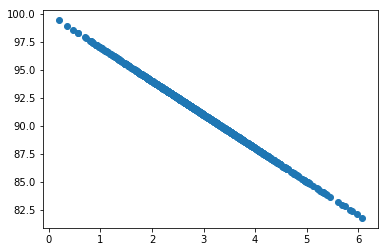

In [5]:
purchaseAmount = 100 - pageSpeeds * 3

scatter(pageSpeeds, purchaseAmount)

correlation (pageSpeeds, purchaseAmount)

Remember, correlation does not imply causality!

記住!相關性不是意味著因果關係!

## Activity

numpy also has a numpy.cov function that can compute Covariance for you. Try using it for the pageSpeeds and purchaseAmounts data above. Interpret its results, and compare it to the results from our own covariance function above.

請使用上述例子改用numpy.cov，看看是否得到同樣結果? 

Numpy中的 cov() 可以直接求得矩陣的共變異數:

![image](./cov公式.png)

In [24]:
np.cov(pageSpeeds, purchaseAmount) 

array([[ 1.10360622e+00, -2.44787933e+01],
       [-2.44787933e+01,  2.32114528e+04]])